Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Introduction to Matplotlib (tutorial)
This notebook gives a short introduction to *Matplotlib*, Python's most popular package for plotting and visualization. Although many different plotting packages exist in the Python ecosystem, Matplotlib is arguably the most versatile and flexible. It would be impossible to cover the entirety of Matplotlib in one tutorial, so this section is really to give you a flavour of the capabilities of Matplotlib, and to cover some of the basics, as well as a couple of more interesting ‘advanced’ features. Here, we will give you a short tour of Matplotlib's most important features.

## Contents
1. Basic Plots
2. Histograms
3. Bar Plots
4. Histograms
5. Box Plots
6. Scatter Plots
7. Scatter Matrix Plots
8. Parallel Coordinates
9. Andrews Curves
10. RadViz
11. Pie Plots
12. The object-oriented Interface

Most of the plotting functionality is contained in the subpackage `pyplot`, which is usually imported as follows:

If you already have a bit of basic Python and Pandas knowledge already, the common route to learning Matplotib is to find examples of plots similar to ones you are trying to create and walk through them, trying to reproduce them with your own data perhaps. A great starting point is the Matplotlib gallery of examples. I recommend this because in practice it is difficult to cover each and every plot type, as the needs of data scientists differ considerably depending on the type of data they are working with or the message they are trying to convey in their visualisation. You might also find it useful to refer to the Matplotlib official documentation as you go along.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # nice and short
from matplotlib import figure
plt.close("all")

## Basic Plotting with Pandas and Matplotlib
In Matplotlib, most of the plotting functions are contained in the `pyplot` package. The plot method on Series and DataFrames is just a simple wrapper around `plt.plot()`:Let's create simple line plot to show how the state-based approach looks like:

2022-01-01   -1.346434
2022-01-02    0.556350
2022-01-03    0.268452
2022-01-04   -0.167831
2022-01-05   -1.994713
                ...   
2024-09-22    7.567377
2024-09-23    8.150585
2024-09-24    5.088665
2024-09-25    4.352607
2024-09-26    4.732955
Freq: D, Length: 1000, dtype: float64


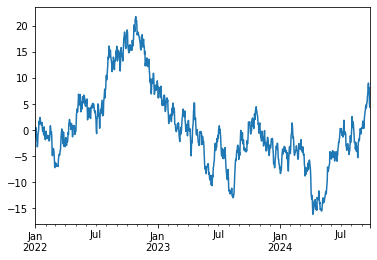

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2022", periods=1000)) #randomly generate a time series
ts = ts.cumsum() # compute the cumulative sum of array elements over a given axis.
print(ts) #output the data
ts.plot(); #plot the data and visualize the plot

             B          C    A
0    -0.658224   0.315133    0
1    -0.155881   0.436887    1
2    -0.113651   0.562409    2
3    -2.274702  -0.136971    3
4    -1.211353   0.465938    4
..         ...        ...  ...
995 -11.139152  11.242241  995
996 -10.220713  11.876939  996
997 -11.584849  11.474088  997
998 -11.234517  11.173495  998
999 -10.986589  11.533790  999

[1000 rows x 3 columns]


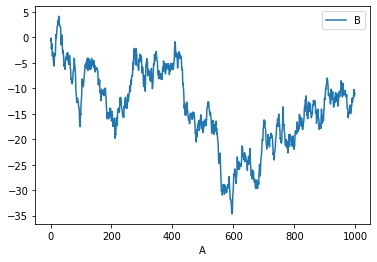

In [3]:
df1 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()
df1["A"] = pd.Series(list(range(len(df1))))
print(df1)
df1.plot(x="A", y="B");

Text(0, 0.5, 'B')

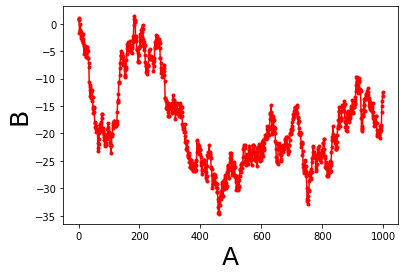

In [5]:
df2 = pd.DataFrame(np.random.randn(1000, 2),\
columns=["B", "C"]).cumsum()
df2["A"] = pd.Series(list(range(len(df2))))
df2.plot(x="A", y="B",c='red',style='-',marker='.',legend=None);
plt.xlabel('A', fontsize=25)  # set the x-axis label
plt.ylabel('B', fontsize=25)  # set the y-axis label

The plt.plot function is perhaps the most basic function, which can be used to create any plot of paired datapoints (x, y). By default, it creates a line plot (as shown above), but the many (optional) parameters in plt.plot allow you to create many different variations! For example, instead of a line, we can plot the data as separate red points by specifying the format in the marker argument (here, '.' to indicate points), the color (by setting the argument c, for color, to "red") and the line style (by setting the argument style, for line style, to "-").

<div class='alert alert-warning'>
    <b>Question 1</b>: Create the same plot as above, but with a green dashed line with diamonds as markers. Check out the <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html">plt.plot</a> documentation under "Notes" which particular linestyle you need for this! And check <a href="https://matplotlib.org/api/markers_api.html">this page</a> to see the name of the marker for diamonds! Make sure to write your code <b>above</b> the "<tt>ax2check = plt.gca()</tt>" snippet &mdash; we use this to check your plot automatically in the test cell! Also, do not include a <tt>plt.show</tt> call; this is done after the <tt>ax2check</tt> line (calling <tt>plt.show</tt> before <tt>ax2check</tt> will cause to test cell to malfunction).
</div>

<Figure size 1800x576 with 0 Axes>

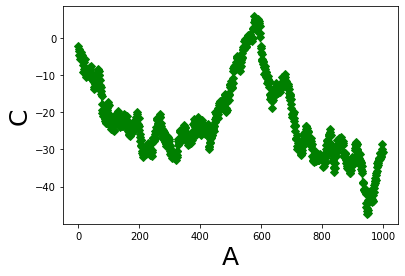

In [12]:
""" Implement the ToDo here. """
# YOUR CODE HERE
plt.figure(figsize=(25,8))
df2 = pd.DataFrame(np.random.randn(1000, 2),\
columns=["B", "C"]).cumsum()
df2["A"] = pd.Series(list(range(len(df2))))
df2.plot(x="A", y="B",c='green',style='--',marker='D',legend=None);
plt.xlabel('A', fontsize=25)  # set the x-axis label
plt.ylabel('C', fontsize=25)  # set the y-axis label

# Do not remove the code below!
ax2check = plt.gca()

In [13]:
""" Tests the ToDo above. """
line = ax2check.get_lines()[0]
if not line._color in ['g', 'green']:
    raise ValueError("The line is not green!")

if line._linestyle != '--':
    raise ValueError("You didn't use a dashed line!")

if line._marker._marker != 'D':
    raise ValueError("You didn't use a marker line!")

print("Yay! Well done.")

Yay! Well done.


There are several other things that you can add to or tweak in your plot. For example, you can add a title with `plt.title` or you can change the default ticks and tick labels using `plt.xticks` (for the x-axis ticks/tick labels) and `plt.yticks` (for the y-axis ticks/tick labels). An example:

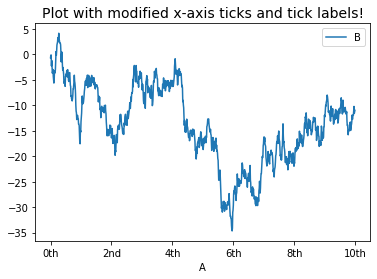

In [14]:
df1.plot(x="A", y="B");
plt.title("Plot with modified x-axis ticks and tick labels!", fontsize=14);
plt.xticks([0, 200, 400, 600,800,1000], ['0th', '2nd', '4th', '6th','8th','10th']);

And you can control the range of the axes by the functions `plt.xlim` and `plt.ylim`:

(-50.0, 30.0)

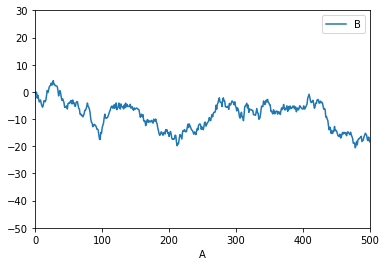

In [16]:
df1.plot(x="A", y="B");
plt.xlim(0, 500)
plt.ylim(-50, 30)

You can also plot multiple dataframe columns within a single plot with one plt.plot command! Below, we create a dataframe (df3) with 4 columns A, B, C and D and plot it in the same plot as our regular (x, y) plot. Importantly, we will include legend with the plot showing what each line represents using the plt legend.

<div class='alert alert-success'>
    <b>Good to know</b>: If you plot multiple things in the same plot, Matplotlib will automatically choose a different color for the different things (first one is blue, second one is orange, third one is green, etc.). 
</div>

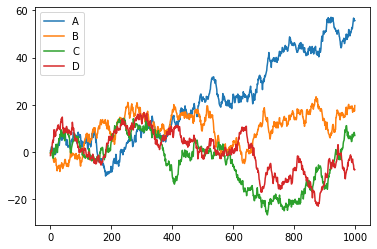

In [17]:
df3 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df3.index = pd.Series(list(range(len(df3))))
df3 = df3.cumsum()
df3.plot();

<div class='alert alert-warning'>
    <b>Question 2</b>: Below, we define some new variables: <tt>z</tt>, the sine of z (<tt>sin_z</tt>), and the cosine of z (<tt>cos_z</tt>). Plot both the (<tt>z</tt>, <tt>sin_z</tt>) and (<tt>z</tt>, <tt>cos_z</tt>) collections as separate dashed lines in whatever (different) colors you like. Make sure to add a legend!
</div>

       sin(z)    cos(z)
A                      
0.0  0.000000  1.000000
0.1  0.099833  0.995004
0.2  0.198669  0.980067
0.3  0.295520  0.955336
0.4  0.389418  0.921061
..        ...       ...
9.5 -0.075151 -0.997172
9.6 -0.174327 -0.984688
9.7 -0.271761 -0.962365
9.8 -0.366479 -0.930426
9.9 -0.457536 -0.889191

[100 rows x 2 columns]


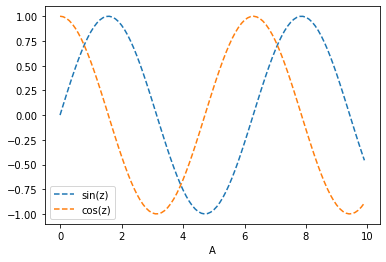

In [19]:
""" Implement your ToDo below. """
import math
df4 = pd.DataFrame([zi / 10 for zi in list(range(100))])
df4["sin(z)"] = pd.Series([math.sin(zi) for zi in df4[0]])
df4["cos(z)"] = pd.Series([math.cos(zi) for zi in df4[0]])
df4 = df4.rename(columns={0:"A"})
df4 = df4.set_index('A')
print(df4)
df4.plot(style='--')
# YOUR CODE HERE


# Do not remove the code below and implement your code *above* this snippet
ax2check = plt.gca()
plt.show()

In [20]:
""" Tests the ToDo above. """
lines = ax2check.get_lines()
if len(lines) != 2:
    raise ValueError(f"I expected 2 lines but found {len(lines)}!")

leg = ax2check.get_legend()
if leg is None:
    raise ValueError("You didn't include a legend!")

n_leg = len(leg.get_lines())
if n_leg != 2:
    raise ValueError("I expected two things in the legend but found {n_leg}!")
    
print("Good job!")

Good job!


## Bar Plots

                    A          B          C          D
2022-01-01  -0.167609  -1.017788   0.805261   1.241902
2022-01-02  -1.232030  -1.970372   0.217626   1.696526
2022-01-03  -1.420619  -2.434852   0.400112   0.908449
2022-01-04  -0.894110  -2.509026  -1.821613   0.411656
2022-01-05  -0.298236  -3.959233  -3.183338  -0.320631
...               ...        ...        ...        ...
2024-09-22  39.541545  60.060413 -22.752474  55.435628
2024-09-23  40.052613  58.805982 -23.797679  53.608222
2024-09-24  40.916360  58.401854 -24.180662  52.074495
2024-09-25  39.791853  58.269434 -22.787977  53.708575
2024-09-26  39.284441  57.560951 -21.287042  54.023944

[1000 rows x 4 columns]
A   -0.894110
B   -2.509026
C   -1.821613
D    0.411656
Name: 2022-01-04 00:00:00, dtype: float64


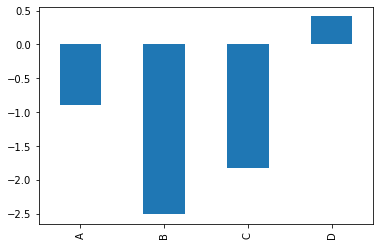

In [24]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
print(df)
print(df.iloc[3])
df.iloc[3].plot(kind="bar");

          a         b         c         d
0  0.077216  0.685439  0.623126  0.272071
1  0.645152  0.711232  0.332027  0.041904
2  0.202323  0.555255  0.725780  0.728506
3  0.374030  0.796809  0.079553  0.421770
4  0.365978  0.890192  0.910460  0.919844
5  0.364835  0.600026  0.603398  0.045158
6  0.590602  0.846911  0.566368  0.500653
7  0.592153  0.971730  0.949147  0.276450
8  0.951782  0.411821  0.657984  0.647651
9  0.289269  0.701227  0.194286  0.977116


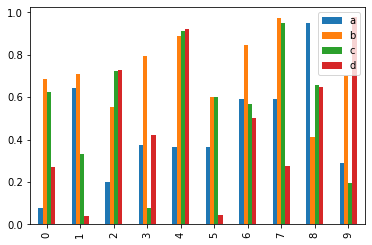

In [25]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
print(df2)
df2.plot.bar();

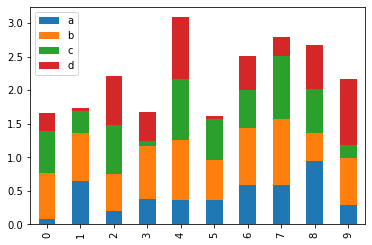

In [26]:
df2.plot.bar(stacked=True);

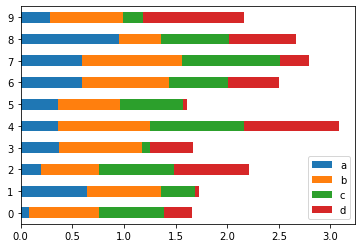

In [27]:
df2.plot.barh(stacked=True);

## Histograms

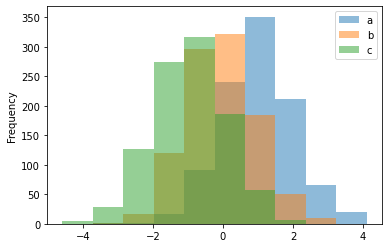

In [32]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)
df4.plot.hist(alpha=0.5);

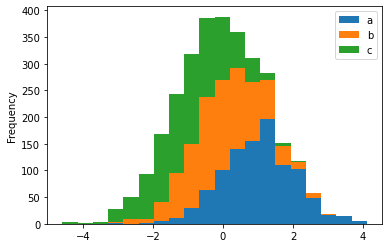

In [33]:
df4.plot.hist(stacked=True, bins=20);

<div class='alert alert-warning'>
    <b>Question 3</b>: Below, we again simulate some random data, but this time not from a uniform distribution, but from a normal distribution (with mean 0.5 and a standard deviation of 0.15). Plot both the uniform data (<tt>random_unif</tt>) and the normal data (<tt>random_norm</tt>) in the same plot, but with different colors (doesn't matter which). Make sure to use 10 bins for each histogram and make sure they are slightly transparent by setting the "alpha" level to 0.5 in both. Also, make sure the ticks and xtick labels are spaced 0.1 apart (i.e., a tick and label at 0, at 0.1, ..., until 1.0). And add a legend! To find out how to set the number of bins and the alpha level, check out the <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html">documentation</a>!
</div>

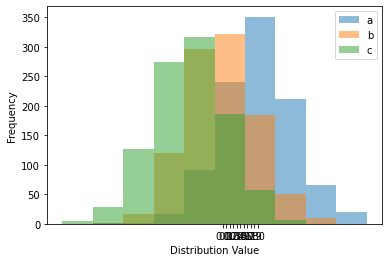

In [44]:
""" Implement the ToDo here! """
import numpy as np
df5 = pd.DataFrame(
    {
        "uniform": np.random.uniform(0,1,100),
        "normal": np.random.normal(0.5,0.15,100),
    },
    columns=["uniform", "normal"],
)
# YOUR CODE HERE
df4.plot.hist(alpha=0.5,bins=10)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlabel("Distribution Value")
# Do not remove the code below
ax2check = plt.gca()
plt.show()

In [45]:
""" Tests the ToDo above. """
import matplotlib
rect = [ch for ch in ax2check.get_children() if ch.__class__ == matplotlib.patches.Rectangle]
if len(rect) != 21:
    raise ValueError(f"I expected 20 bins in total (10 per histogram), but found {len(rect) - 1}!")

if rect[0]._alpha != 0.5:
    raise ValueError(f"The alpha level is not 0.5 (but {rect[0]._alpha})!")

leg = ax2check.get_legend()
if leg is None:
    raise ValueError("I couldn't find a legend!")


if len(ax2check.get_xticks()) != 11:
    raise ValueError("There should be 11 x-axis ticks and labels!")

xticks = ax2check.get_xticks()
if isinstance(xticks, np.ndarray):
    xticks = [round(xt, 1) for xt in xticks.tolist()]

if not xticks == [i / 10 for i in list(range(11))]:
    raise ValueError("The x-axis ticks and tick labels are not yet correct ...")

print("Awesome!")

ValueError: I expected 20 bins in total (10 per histogram), but found 30!

## Box Plots

In [ ]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.plot.box();

## Scatter Plots

In [ ]:
iris_df = pd.read_csv("data/iris_csv.csv")
iris_df.plot.scatter(x="petallength", y="petalwidth");

## Scatter Matrix Plot

In [ ]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");

## Parallel coordinates

In [ ]:
from pandas.plotting import parallel_coordinates
data = pd.read_csv("data/iris_csv.csv")
parallel_coordinates(data, "class");

## Andrews Curves

In [ ]:
from pandas.plotting import andrews_curves
data = pd.read_csv("data/iris_csv.csv")
andrews_curves(data, "class");

## RadViz

In [ ]:
from pandas.plotting import radviz
data = pd.read_csv("data/iris_csv.csv")
radviz(data, "class");

## Pie Plots

In [ ]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(6, 6));

## The object-oriented interface
The state-based plotting approach is easy to learn and pretty straightforward, but when you start creating more complex visualizations, you'll notice that the alternative "object-oriented" approach becomes easier to use. In this section, we will explain this approach by recreating some of the previous plots from the state-based section. We will also discuss some more advanced plotting techniques, such as creating subplots.

Now, within the object-oriented approach, we can explain some of the more technical (but important!) concepts. One of those is that each Matplotlib plot consists of a `Figure` object and one or more `Axes` objects. Essentially, the `Figure` object represents the entire canvas that defines the, well, figure. The `Axes` object(s) contains the actual visualizations that you want to include in the `Figure` (see figure below). Importantly, there may be one *or* multiple `Axes` object within a given `Figure` (e.g., two line plots next to each other). 

![mpl2](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

*Figure from Brad Solomon, from [https://realpython.com/python-matplotlib-guide/](https://realpython.com/python-matplotlib-guide/)*

<div class='alert alert-danger'>
    <b>Warning</b>: Note that an <tt>Axes</tt> object is something different than the x-axis and y-axis ("axes") of a plot! 
</div>

Importantly, a `Figure` object by itself doesn't do anything. It just defines the canvas to drawn on, so to speak. `Figure` objects can be initialized using `plt.figure`, which takes several (optional) arguments like `figsize` (width and height in inches) and `dpi` ("dots per inch", i.e., resolution). Let's take a look:

In [ ]:
fig = plt.figure(figsize=(8, 4))
plt.show()

As you can see, nothing happens. We also need an `Axes` object! We can create this using `plt.axes`. Note that, even in the object-oriented appoach, we need the function `plt.show` to render the figure.

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax = plt.axes()
plt.show()

Instead of creating the `Figure` and `Axes` objects separately, we highly recommend using the function `plt.subplots` to create them both at the same time. Like the name suggests, this function also allows you to create multiple subplots (across different `Axes`), which we'll discuss later. For now, we'll just use it to create a `Figure` and `Axes` object at once. Note that all arguments for creating `Figures` using `plt.figure` also work for `plt.subplots`. For example, you can give `plt.subplots` the arguments `figsize=(8, 4)` and `dpi=200` (these must be specified with keywords, however)! Check out the [full documentation] of `plt.subplots` to get an idea about the different arguments it accepts.

Anyway, let's take a look: 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.show()

Alright, great, but it's still an empty canvas! Now, we could of course plot some data using the state-based interface (e.g., `plt.plot(x, y)`). Here, however, we will use the object-oriented approach. The only difference between these two approaches is that plotting in the object-oriented approach is done through the *methods* of the `Ax` object instead of the functions from the `pyplot` module. An example:

In [ ]:
df1.plot(x="A", y="B",subplots=True, figsize=(6, 6));  # here, `plot` is a method, not a function!

Basically all functions from the state-based interface are available as methods in the object-oriented approach. For example, to create a legend, run `ax.legend` (instead of `plt.legend`):

In [ ]:
df = pd.DataFrame(np.random.randn(100, 4), columns=["A", "B", "C", "D"])
fig, axes = plt.subplots(4, 4, figsize=(9, 9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False);
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False);

Okay, time for an exercise!

<div class='alert alert-warning'>
    <b>Question 4</b>: Below, using a so-called "random walk", we create some random numbers representing two time series. Let's pretend that this data represents the stock price of two companies (Tesla and Shell) across 100 consecutive days. Create a <tt>Figure</tt> of 12 (width) by 4 (height) inches and a single <tt>Axes</tt> onto which you plot this time series data (as lines). Label the axes appropriately and set the range of the x-axis from 1 to 100.
</div>

In [ ]:
df5 = pd.DataFrame(
    {
        "step1": np.random.uniform(-1,1,100),
        "step2": np.random.uniform(-1,1,100),
    },
    columns=["step1", "step2"],
)
df5["tesla"]= 40 + df5["step1"]
df5["shell"]= 35 + df5["step2"]
df5["days"]= pd.Series(list(range(1, 101)))
df5 = df5.set_index("days")

# YOUR CODE HERE
raise NotImplementedError()

# Do not remove the code below
ax2check = plt.gca()
plt.show()

In [ ]:
""" Tests the above ToDo. """
lines = ax2check.get_lines()
if len(lines) != 2:
    raise ValueError(f"I expected two lines, but I saw {len(lines)}!")
    
if ax2check.get_legend() is None:
    raise ValueError("There is no legend!")

if not ax2check.get_xlabel():
    raise ValueError("There is no label for the x-axis!")
    
if not ax2check.get_ylabel():
    raise ValueError("There is no label for the y-axis!")

print("YES! Well done!")

Okay, one last thing we want to show you is how to save figures to disk! In the object-oriented interface, you can save figures using the `Figure` method `savefig` (check out its [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html)). The only mandatory argument is a filename, including an extension. The extension determines as which file type the figure is saved. If you want to save a figure as a PNG file, you can for example do the following:

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
df5["tesla"].plot(ax=ax);
fig.savefig('my_awesome_figure.png')

This actually created a new file, "my_awesome_figure.png", in our current directory. We can double-check this using the command `!ls`, which is some Jupyter magic that allows us to use a code cell as a terminal temporarily:

In [ ]:
!ls

## Subplots
In this optional section, we will discuss figures with "subplots", i.e., figures with more than one `Axes` object! The easiest way to do this is to use the `plt.subplots` function. This function accepts the arguments `ncols` and `nrows` to create a figure with multiple `Axes` next to each other (`ncols` > 1) or below each other (`nrows` > 1). For example, suppose that I want to create a figure with three plots next to each other:

In [ ]:
# Note that I use the variable name "axes" here instead of "ax" like before
# This is not necessary, but I find it helpful because it tells me this variable contains
# more than one axis
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))

The variable `axes` is slightly different from what we've seen before. Let's check out its type:

In [ ]:
type(axes)

When you create a figure with more than one `Axes` object, the function `plt.subplots` returns a so-called *numpy* ndarray with `Axes` ("ndarray" stands for *N*-dimensional array). Numpy arrays are data structures that we discuss at length in the last (optional) notebook of this week. For now, you can interpret numpy arrays as (in this case) one or two-dimensional lists. To access the individual `Axes` objects from the numpy array, we can index them as if they are lists. For example:

In [ ]:
first_ax = axes[0]

Now, let's plot some stuff in our different `Axes` objects.

<div class='alert alert-warning'>
    <b>Question 5</b>: As you probably have noticed by now, if you don't explicitly give Matplotlib a range for the axes (using <tt>xlim</tt> and <tt>ylim</tt>), it will chose a suitable range itself, which results in separate ranges for the subplots in the above figure. To force the same range across subplots, set the arguments <tt>sharex</tt> and/or <tt>sharey</tt> to <tt>True</tt> in the <tt>plt.subplots</tt> call. Do this in the previous code cell to force the same range across the y-axes!
</div>

We can, of course, create figures with multiple columns *and* multiple rows. For example, to create a 2 by 2 grid of `Axes`, we can do the following:

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(5, 5))

<div class='alert alert-success'>
    <b>Tip</b>: Sometimes, like in the figure above, subplots may overlap slightly, especially in small figures. Matplotlib has a neat function to fix this: <tt>plt.tight_layout</tt>. Try adding it to the code cell above on the last line).
</div>

Some `pyplot` functions (like `plt.title`), however, are prefixed with `set_` in the object-oriented interface (e.g., `ax.set_title`):

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
df["A"].plot(ax=axes[0, 0]);
axes[0, 0].set_title("A");
df["B"].plot(ax=axes[0, 1]);
axes[0, 1].set_title("B");
df["C"].plot(ax=axes[1, 0]);
axes[1, 0].set_title("C");
df["D"].plot(ax=axes[1, 1]);
axes[1, 1].set_title("D");

Currently, the `axes` variable is a two-dimensional numpy array (because it has both multiple columns and multiple rows). We can double-check this by checking out the `shape` attribute from the numpy array:

In [ ]:
axes.shape

Now, to access the individual `Axes` objects from this numpy array, we need two indices: one to indicate the row and one to indicate the column. For example, to get the upper left `Axes` object (i.e., first row, first column), we do:

In [ ]:
upper_left_ax = axes[0, 0]

To get the upper right `Axes` object (i.e., first row, second column), we do:

In [ ]:
upper_right_ax = axes[0, 1]

<div class='alert alert-warning'>
    <b>Question 6</b>: Extract the lower right <tt>Axes</tt> object and store it in a variable named <tt>lower_right_ax</tt>
</div>

In [ ]:
""" Implement the ToDo here. """
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
""" Tests the above ToDo. """
if lower_right_ax != axes.flatten()[-1]:
    raise ValueError("That is not the correct Axes object ...")

print("Well done!")

Alright, there is not much more to subplots that we explained here! Let's finish with a difficult exercise for those that want a challenge. From trigonometry, you may remember we can how to create a sine wave with a particular amplitude and frequency. Below, we included a function, `create_sine_wave`, which takes in a list of timepoints, a desired frequecy, and a desired amplitude:

In [ ]:
def create_sine_wave(timepoints, frequency=1, amplitude=1):
    """ Creates a sine wave with a given frequency and amplitude for a given set of timepoints. 
    
    Parameters
    ----------
    timepoints : list
        A list with timepoints (assumed to be in seconds)
    frequency : int/float
        Desired frequency (in Hz.)
    amplitude : int/float
        Desired amplitude (arbitrary units)
        
    Returns
    -------
    sine : list
        A list with floats representing the sine wave
    """
    sine = [amplitude * math.sin(2 * math.pi * frequency * t) for t in timepoints]
    return sine

Given some timepoints, we can plot its corresponding sine wave:

In [ ]:
df6 = pd.DataFrame([i / 100 for i in range(500)], columns=['timepoints'])
df6["sine"] = create_sine_wave(timepoints)
fig, ax = plt.subplots(figsize=(8, 2))
df6.plot("timepoints","sine",ax=ax);
ax.set_xlabel("Time")
ax.set_ylabel("sin(x)")
ax.set_xlim(0, max(timepoints))

We already created a quite complicated figure with 9 subplots (3 rows, 3 columns), which shows a sine wave with increasing frequencies (1, 3, 5) across columns and increasing amplitudes across rows (1, 2, 4). We'll show this figure below:

![sines](solution_sine_wave_plot.png)

<div class='alert alert-warning'>
    <b>Quetion 7</b>: Try to recreate the figure above with your own code! Use a <tt>figsize</tt> of (10, 10). Good luck! (No test cell)
</div>

In [ ]:
""" Implement your ToDo here. """
# YOUR CODE HERE
raise NotImplementedError()